In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Figures/wandb_export_2022-11-08T13 06 25.822+01 00.csv')[::-1]

In [3]:
df.head()

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,batch_size,model_type,...,GFLOPS,accuracy,best_epoch,best_val_loss,epoch,loss,lr,val_accuracy,wrong_class,val_loss
39,cnn2-0,finished,-,jschuetzke,NaN,2022-11-07T13:11:37.000Z,368,NaN,128,cnn2,...,0.069968,0.99772,62,0.024204,79,0.006313,3.000000e-08,0.9910,34,0.024437
38,cnn2-1,finished,-,jschuetzke,NaN,2022-11-07T13:17:46.000Z,295,NaN,128,cnn2,...,0.069968,0.99748,37,0.026159,62,0.006891,3.000000e-07,0.9892,39,0.027634
37,cnn2-2,finished,-,jschuetzke,NaN,2022-11-07T13:22:43.000Z,343,NaN,128,cnn2,...,0.069968,0.99908,48,0.021190,73,0.002668,3.000000e-07,0.9930,31,0.021911
36,cnn2-3,finished,-,jschuetzke,NaN,2022-11-07T13:28:27.000Z,344,NaN,128,cnn2,...,0.069968,0.99848,48,0.029063,73,0.004341,3.000000e-07,0.9904,50,0.030290
35,cnn2-4,finished,-,jschuetzke,NaN,2022-11-07T13:34:13.000Z,306,NaN,128,cnn2,...,0.069968,0.99732,40,0.026525,65,0.006478,3.000000e-07,0.9900,36,0.027101


In [4]:
df['runtime_min'] = df['Runtime'] / 60

In [5]:
df.groupby('model_type').agg(['max','min','mean'])[['wrong_class','best_epoch','runtime_min']]

/tmp/ipykernel_25962/1748031585.py:1: FutureWarning: ['Name', 'State', 'Notes', 'User', 'Created'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('model_type').agg(['max','min','mean'])[['wrong_class','best_epoch','runtime_min']]


wrong_class           best_epoch           runtime_min             \
                   max min  mean        max min  mean         max        min   
model_type                                                                     
cnn2                50  31  38.0         62  37  47.0    6.133333   4.916667   
cnn3                34  25  28.4         60  34  48.6   10.883333   7.750000   
cnn6                12   6   8.4         94  62  71.6   38.466667  28.250000   
cnn_bn              50  33  44.2         54  24  37.2    8.950000   5.683333   
inc3                20  12  17.2         45  28  34.4   15.866667  12.083333   
inc6                13  10  11.4         44  25  35.2   24.533333  18.500000   
resnet              22  20  21.2         27  19  23.4   50.716667  42.850000   
vgg                 31  16  21.6        134  59  83.8    8.733333   5.266667   

                       
                 mean  
model_type             
cnn2         5.520000  
cnn3         9.376667  
cnn6        30.993333  
cnn_bn       7.110000  
inc3        13.493333  
inc6        21.776667  
resnet      47.166667  
vgg          6.553333

In [6]:
df[['Name','model_type','accuracy','wrong_class']].groupby('model_type').head()

,Name,model_type,accuracy,wrong_class
39,cnn2-0,cnn2,0.99772,34
38,cnn2-1,cnn2,0.99748,39
37,cnn2-2,cnn2,0.99908,31
36,cnn2-3,cnn2,0.99848,50
35,cnn2-4,cnn2,0.99732,36
34,cnn3-0,cnn3,0.99948,34
33,cnn3-1,cnn3,0.99932,27
32,cnn3-2,cnn3,0.99928,31
31,cnn3-3,cnn3,0.99896,25
30,cnn3-4,cnn3,0.99900,25


In [7]:
df[['Name','model_type','accuracy','wrong_class']].sort_values('wrong_class').groupby('model_type').first()

,Name,accuracy,wrong_class
model_type,,,
cnn2,cnn2-2,0.99908,31
cnn3,cnn3-4,0.99900,25
cnn6,cnn6-0,0.99552,6
cnn_bn,cnn_bn-1,0.99896,33
inc3,inc3-0,0.99892,12
inc6,inc6-1,0.99904,10
resnet,resnet-2,0.99960,20
vgg,vgg-3,0.99732,16


### Calculate train data misclassifications

In [8]:
n_total = 50*500
percentages = np.array([(n_total-f)/n_total for f in range(1000)])
accs = df['accuracy'].values

In [9]:
accs

array([0.99772   , 0.99747998, 0.99908   , 0.99848002, 0.99732   ,
       0.99948001, 0.99931997, 0.99927998, 0.99896002, 0.99900001,
       0.99552   , 0.99444002, 0.99419999, 0.9946    , 0.99396002,
       0.99732   , 0.99712002, 0.99776   , 0.99732   , 0.99699998,
       0.99975997, 0.99980003, 0.99959999, 0.99963999, 0.99952   ,
       0.99848002, 0.99896002, 0.99883997, 0.99952   , 0.99904001,
       0.99892002, 0.99900001, 0.99919999, 0.99904001, 0.99940002,
       0.99868   , 0.99904001, 0.99776   , 0.99868   , 0.99888003])

In [10]:
df['miscl_train'] = np.argmin(np.abs(accs[:,None] - percentages[None,:]), axis=1)

### Actual Figures

In [11]:
plt.rcParams.update({'font.size': 14})

<AxesSubplot: xlabel='model_type', ylabel='epoch'>

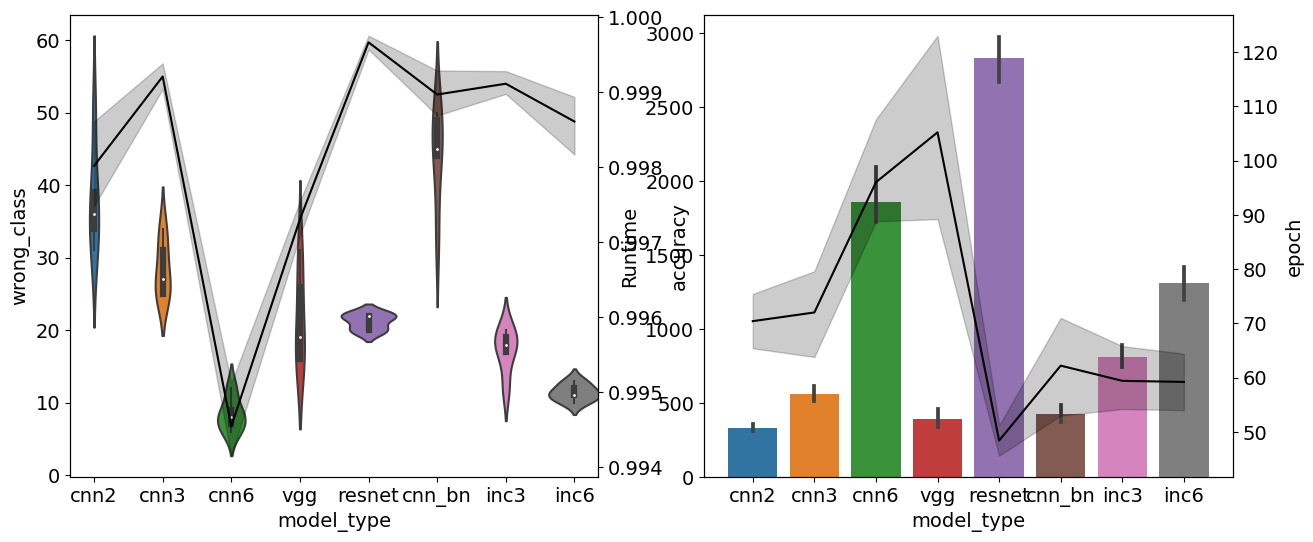

In [12]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.violinplot(x='model_type', y='wrong_class', data=df, ax=ax[0])
ax1 = ax[0].twinx()
sns.lineplot(x='model_type', y='accuracy', color='black', data=df, ax=ax1)
sns.barplot(x='model_type', y='Runtime', data=df, ax=ax[1])
ax2 = ax[1].twinx()
sns.lineplot(x='model_type', y='epoch', color='black', data=df, ax=ax2)

In [13]:
plt.rcParams.update({'font.size': 14})

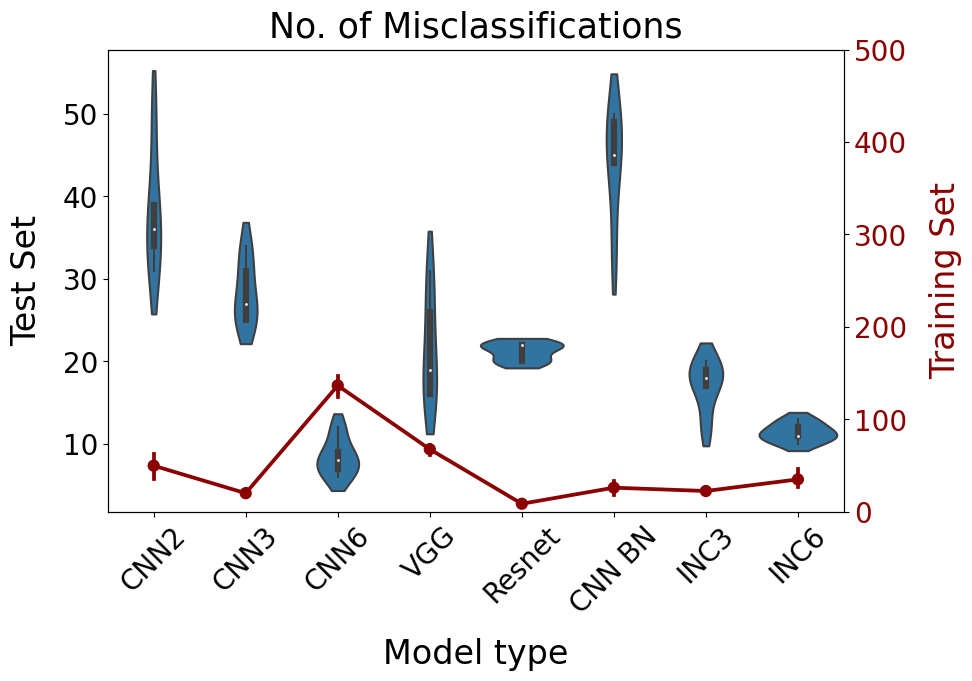

In [14]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(9.5, 6))
ax = plt.gca()
sns.violinplot(x='model_type', y='wrong_class', data=df, ax=ax, color=sns.color_palette()[0], cut=0.99, width=0.9)
ax1 = ax.twinx()
#sns.lineplot(x='model_type', y='miscl_train', color='darkred', data=df, ax=ax1)
sns.pointplot(x='model_type', y='miscl_train', color='darkred', data=df, ax=ax1)
ax1.set_ylim(0,500)
ax.set_ylabel('Test Set', fontsize=24, labelpad=14)
ax1.set_yticks([0,100,200,300,400,500], [0,100,200,300,400,500], color='darkred')
ax1.set_ylabel('Training Set', fontsize=24, color='darkred', labelpad=16)
plt.xticks(np.arange(8),['CNN2','CNN3','CNN6','VGG','Resnet','CNN BN', 'INC3', 'INC6'], fontsize=24, rotation=45)
ax.tick_params(axis='x', labelsize=20, rotation=45)
ax.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Model type', fontsize=24, labelpad=14)
plt.title('No. of Misclassifications', fontsize=25, y=1.01)
#plt.savefig('Figures/misclassifications.eps', bbox_inches='tight')
plt.show()